Name: Bhuvan Patil (CS22181)

Importing the Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

Load the titanic dataset

In [298]:
dataset = pd.read_csv("titanic.csv")

Data preprocessing

In [ ]:
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [300]:
dataset.shape

(891, 12)

In [301]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [302]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the Missing values

In [303]:
df_clean = dataset.copy()
# Drop Cabin as it has too many missing values
df_clean.drop('Cabin', axis=1, inplace=True)

In [304]:
# Fill missing Age with median
df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)

In [305]:
# replacing the missing values in "Embarked" column with mode value
df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)

In [306]:
# check the number of missing values in each column
df_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Exploratory data analysis (EDA)

In [307]:
# Print the preprocessed data info
print("\nPreprocessed Data Info:")
print(df_clean.info())
print("\nPreprocessed Data Sample:")
print(df_clean.head())


Preprocessed Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None

Preprocessed Data Sample:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

            

In [308]:
# finding the number of people survived and not survived
df_clean['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [309]:
df_clean['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [310]:
df_clean['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Data Visualization

In [311]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

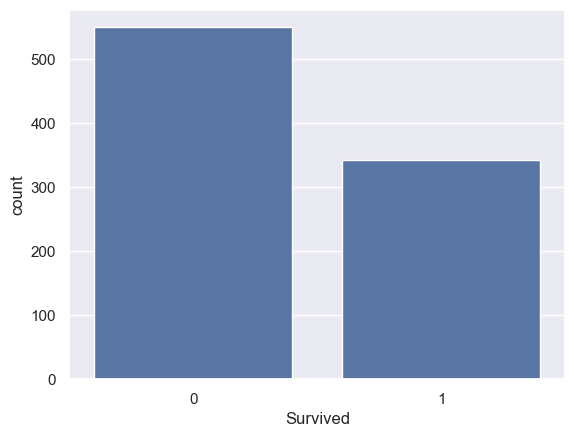

In [312]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=dataset)

<Axes: xlabel='Sex', ylabel='count'>

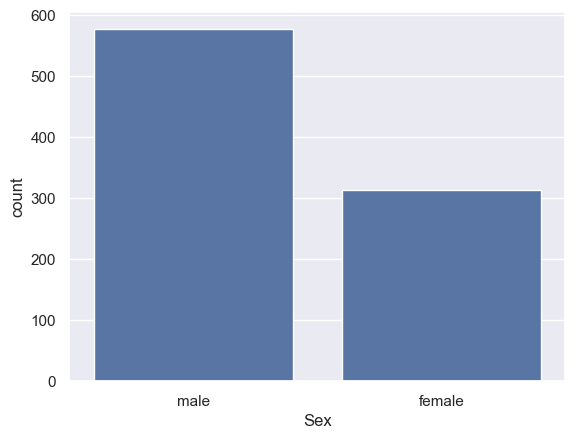

In [313]:
# making a count plot for "Sex" column
sns.countplot(x='Sex', data=dataset)

<Axes: xlabel='Sex', ylabel='count'>

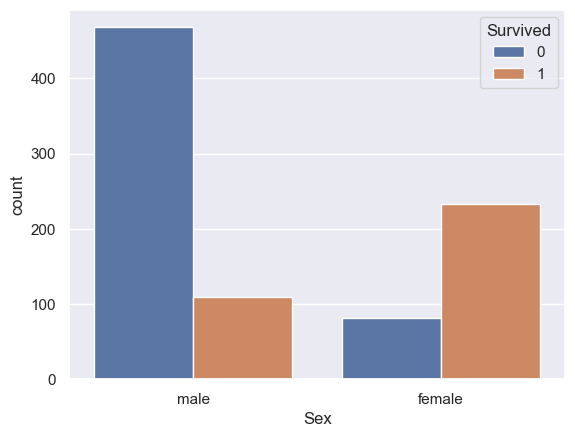

In [314]:
# number of survivors Gender wise
sns.countplot(x='Sex', hue='Survived', data=dataset)

<Axes: xlabel='Pclass', ylabel='count'>

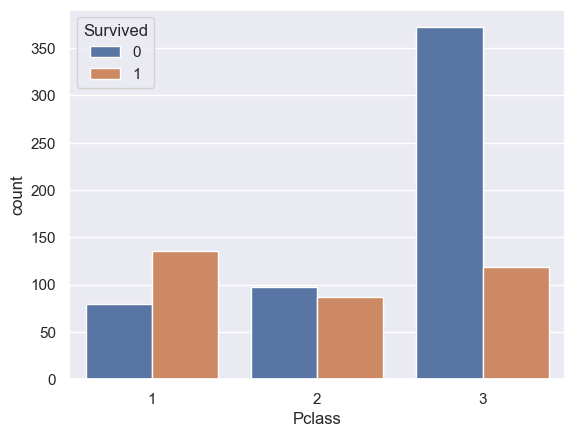

In [315]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', hue='Survived', data=dataset)

Text(0.5, 1.0, 'Correlation Heatmap')

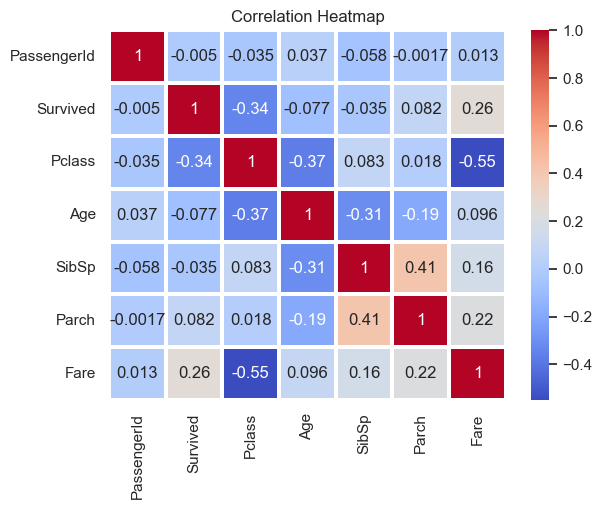

In [ ]:
# Correlation heatmap for numerical features
numeric_df = dataset.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=1.5)
plt.title('Correlation Heatmap')

Feature Engineering

In [317]:
# Create a Title feature from Name
df_clean['Title'] = df_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print("\nTitle distribution:")
print(df_clean['Title'].value_counts())


Title distribution:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


In [318]:
# Create family size feature
df_clean['FamilySize'] = df_clean['SibSp'] + df_clean['Parch'] + 1

In [319]:
# Create IsAlone feature
df_clean['IsAlone'] = (df_clean['FamilySize'] == 1).astype(int)

In [320]:
# Encode Sex
le_sex = LabelEncoder()
df_clean['Sex'] = le_sex.fit_transform(df_clean['Sex'])

In [321]:
# Encode Embarked
le_embarked = LabelEncoder()
df_clean['Embarked'] = le_embarked.fit_transform(df_clean['Embarked'])

In [322]:
# Encode Title
le_title = LabelEncoder()
df_clean['Title'] = le_title.fit_transform(df_clean['Title'])

In [323]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,12,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,13,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,9,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,13,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,12,1,1


Feature selection

In [324]:
# Drop unnecessary columns
df_clean.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [325]:
# Define features and target
X = df_clean.drop('Survived', axis=1)
y = df_clean['Survived']

Splitting the data into training data & Test data

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [327]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 10) (179, 10) (712,) (179,)


Train the Random Forest model

In [328]:
print("\nTraining Random Forest model...")

# Initialize and train the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
rf_model.fit(X_train, y_train)


Training Random Forest model...


RandomForestClassifier(max_depth=5, random_state=42)

In [329]:
print("\n===== Model Evaluation =====")

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Predictions on test set
y_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


===== Model Evaluation =====
Cross-validation Accuracy: 0.8258 ± 0.0174
Test Accuracy: 0.8101
Precision: 0.8030
Recall: 0.7162
F1 Score: 0.7571



===== Confusion Matrix =====


Text(0.5, 33.249999999999986, 'Predicted Label')

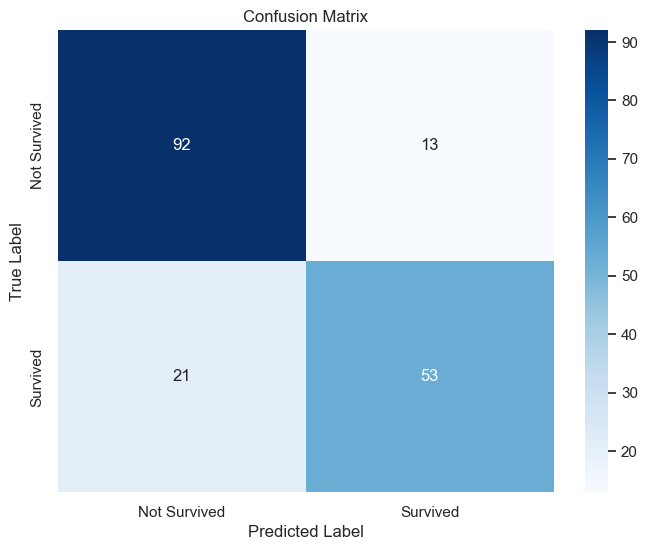

In [330]:
print("\n===== Confusion Matrix =====")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

In [331]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

